In [1]:
RESULTS_ZIP_FILE = "../../results/pix2code/pix2code_web_with_html.zip"
RESULTS_FOLDER_DESTINATION = "../../results/pix2code"

In [8]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [2]:
RESULTS_FOLDER = "../../results/pix2code/pix2code_web_with_html"

In [10]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

348

In [12]:
%run ../../utils/postprocessing.py --folder ../../results/pix2code/pix2code_web_with_html --suffix .txt --pix2code

100%|██████████| 348/348 [00:00<00:00, 5265.39it/s]


In [13]:
%run ../../utils/extract_screenshots --folder ../../results/pix2code/pix2code_web_with_html

100%|██████████| 348/348 [06:53<00:00,  1.19s/it]


In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/pix2code/pix2code_web_with_html 

In [3]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [6]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [7]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index,prediction_length
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2539.074713,2571.948276,2575.885057,0.846718,176.344828,0.124321,0.954650,1.770115,0.032863,0.970167,2539.074713
std,314.849317,327.184014,325.675338,0.021297,44.626343,0.018289,0.021950,1.456111,0.026681,0.011877,314.849317
min,1589.000000,1590.000000,1592.000000,0.781053,36.000000,0.081448,0.879358,0.000000,0.000000,0.911992,1589.000000
25%,2645.250000,2668.000000,2671.500000,0.832370,155.000000,0.112402,0.936423,0.000000,0.000000,0.966937,2645.250000
50%,2683.000000,2705.000000,2705.000000,0.847127,184.500000,0.125000,0.955053,2.000000,0.036364,0.970757,2683.000000
75%,2688.000000,2744.750000,2744.750000,0.860219,203.750000,0.133763,0.969598,2.000000,0.048780,0.973662,2688.000000
max,3195.000000,3218.000000,3218.000000,0.904102,292.000000,0.187781,1.000000,4.000000,0.108108,0.994426,3195.000000


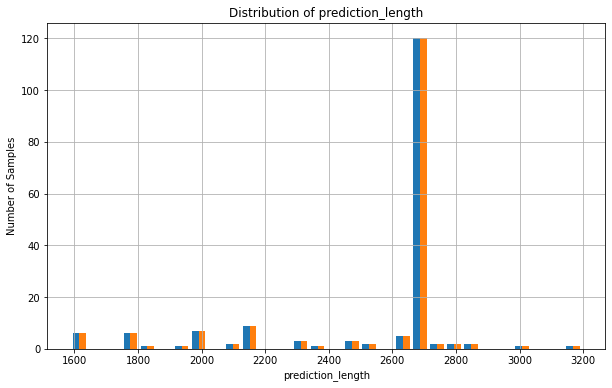

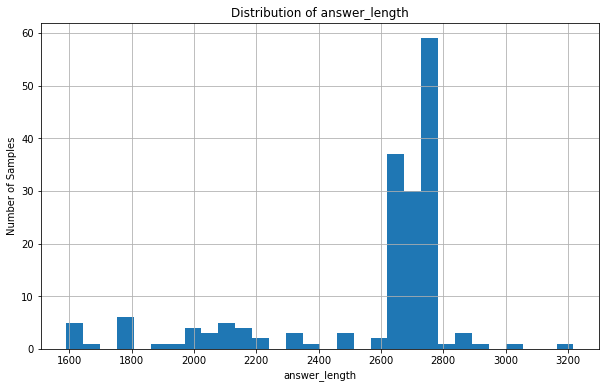

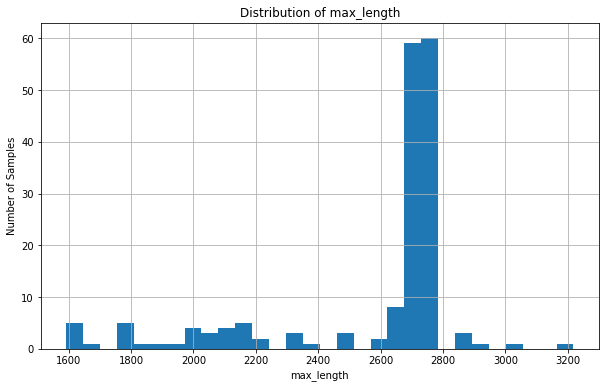

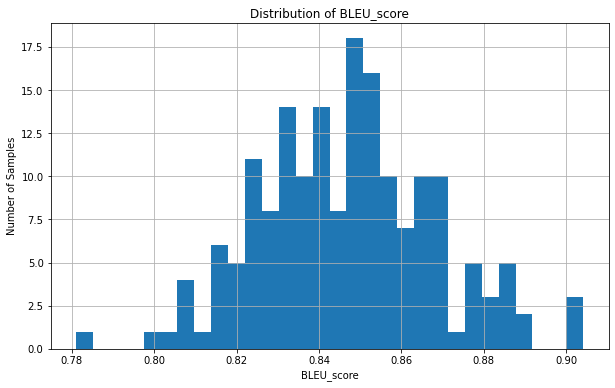

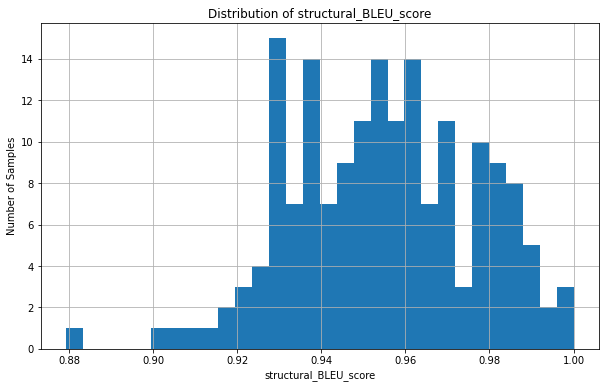

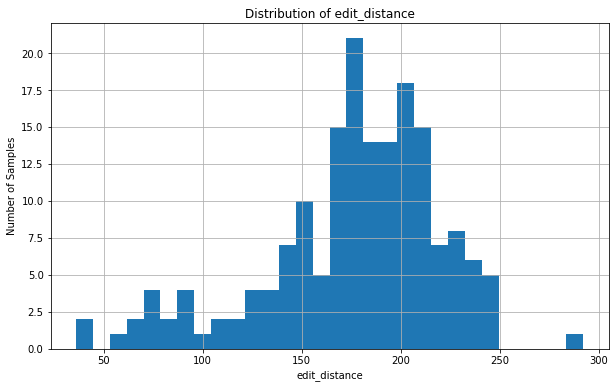

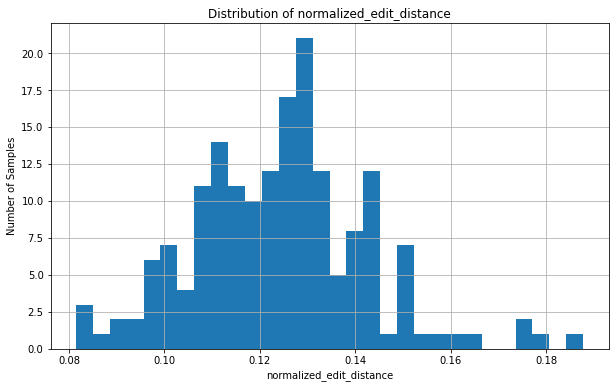

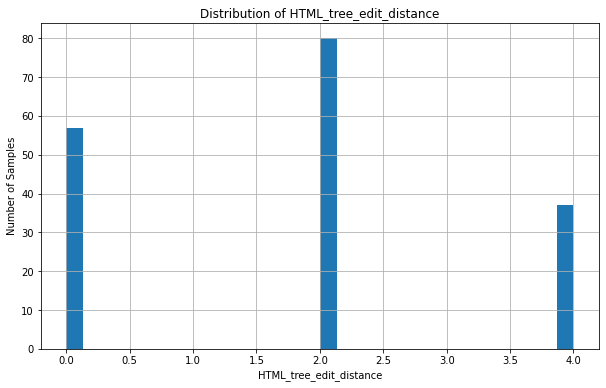

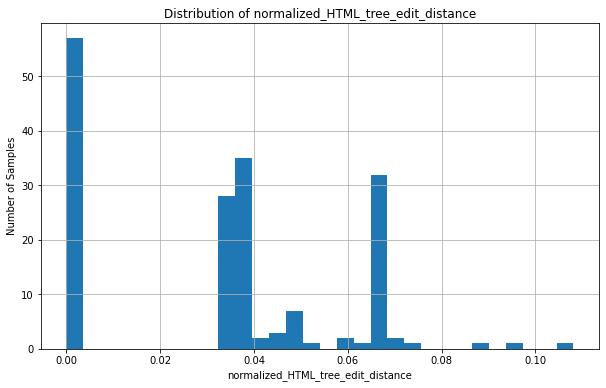

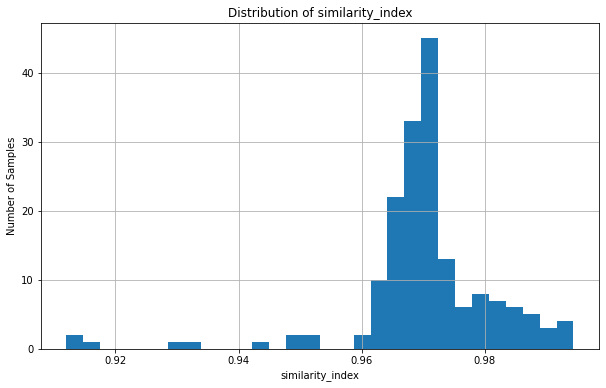

In [8]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


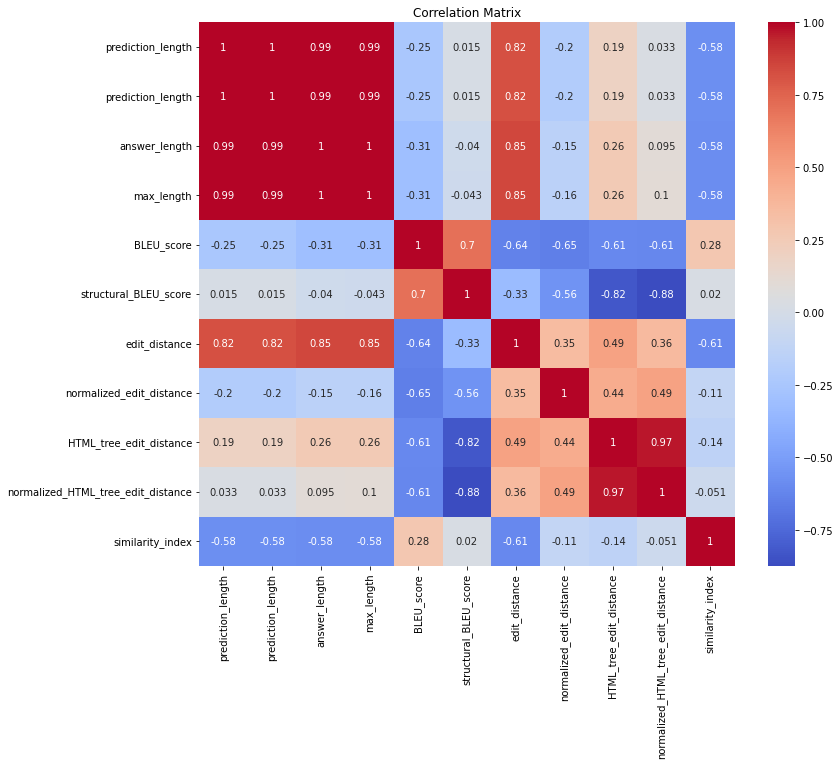

In [9]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

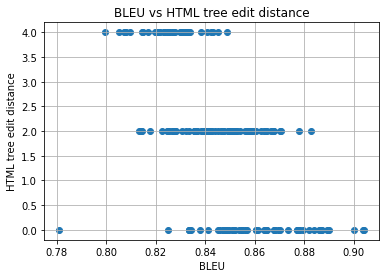

In [10]:
plt.scatter(df["BLEU_score"], df["HTML_tree_edit_distance"])
plt.title("BLEU vs HTML tree edit distance")
plt.xlabel("BLEU")
plt.ylabel("HTML tree edit distance")
plt.grid(True)
plt.show()


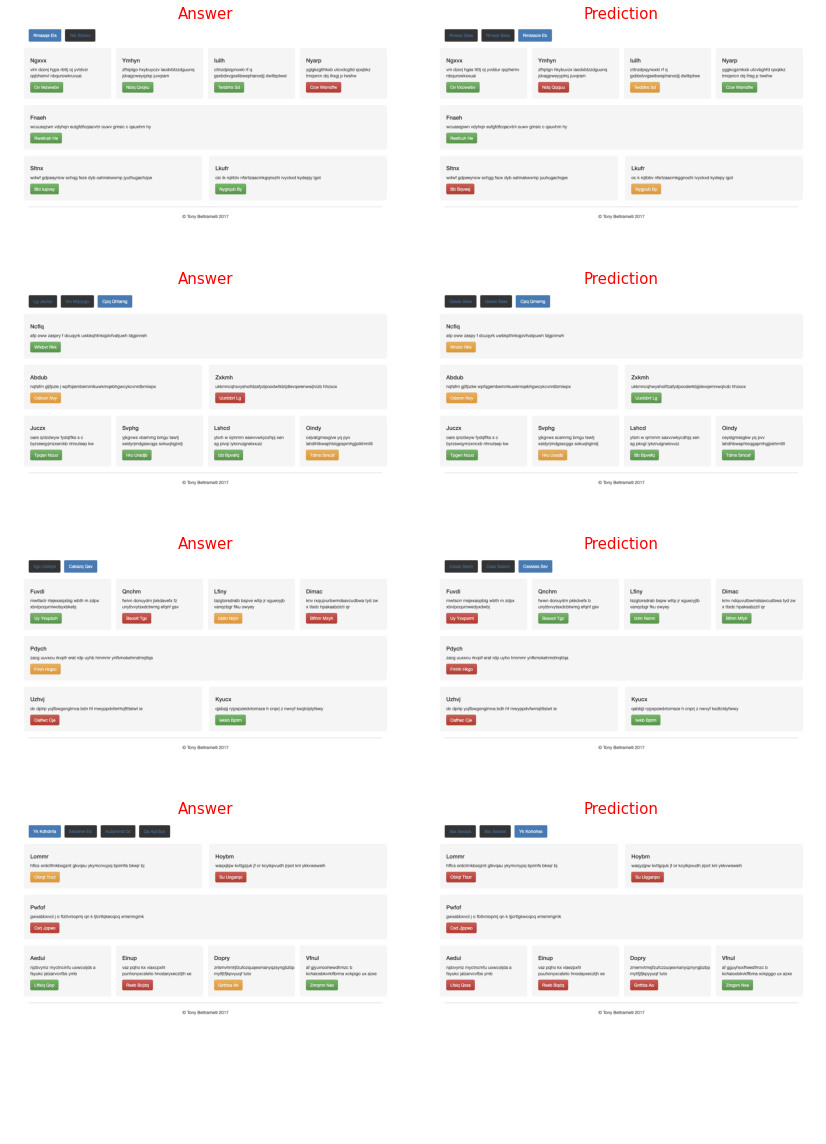

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 4

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(13, NUMBER_DISPLAYED*4))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')

        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
